# Chapter: Exploratory Data Analysis: Getting to Know Your Data Well


# Topic: Multimodality Assessment

In [1]:
# import required packages
import numpy as np, matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})

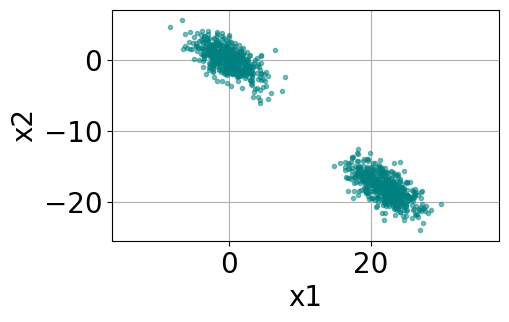

In [2]:
# generate data
np.random.seed(1)

cov = np.array([[6, -3], [-3, 3.5]])
pts1 = np.random.multivariate_normal([0, 0], cov, size=500)
cov = np.array([[6, -3], [-3, 3.5]])
pts2 = np.random.multivariate_normal([22, -18], cov, size=500)

data = np.vstack((pts1, pts2))

plt.figure(figsize=(5,3))
plt.plot(data[:, 0], data[:, 1], '.', color='teal',alpha=0.5)
plt.axis('equal')
plt.xlabel('x1'), plt.ylabel('x2')
plt.grid()

plt.show()

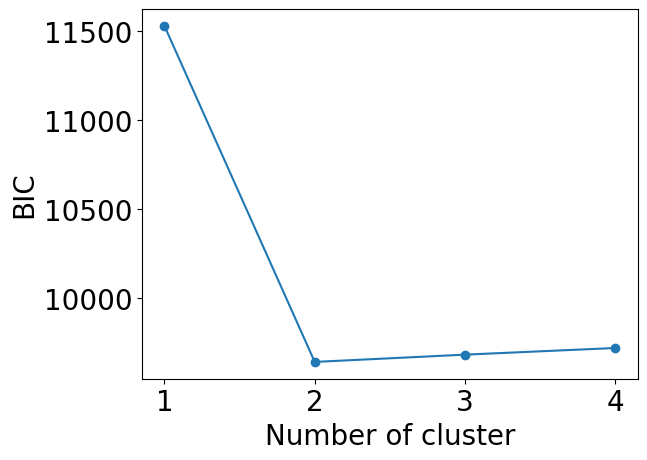

In [3]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#                    check for multi clusters via GMM
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
from sklearn.mixture import GaussianMixture

BICs = []
lowestBIC = np.inf
for n_cluster in range(1, 5):
    gmm = GaussianMixture(n_components = n_cluster, random_state = 100).fit(data)
    BIC = gmm.bic(data)
    BICs.append(BIC)
    
    if BIC < lowestBIC:
        optimal_n_cluster = n_cluster 
        lowestBIC = BIC

plt.figure()
plt.plot(range(1, 5), BICs, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('BIC')

plt.show()

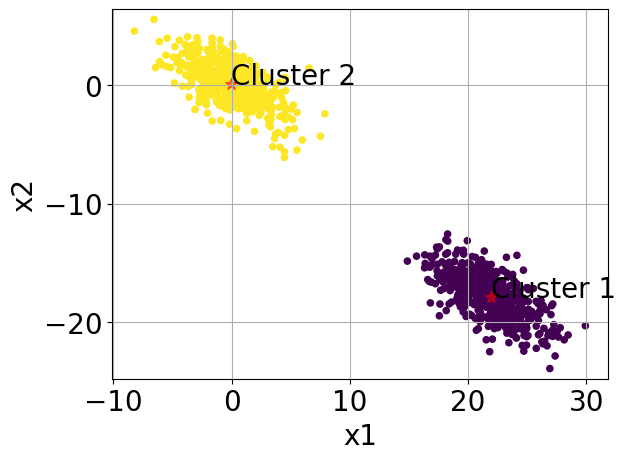

In [4]:
# refit GMM with optimal number of clusters and show the cluster centers
gmm = GaussianMixture(n_components = optimal_n_cluster, random_state = 100)
cluster_label = gmm.fit_predict(data)

plt.figure()
plt.scatter(data[:, 0], data[:, 1], c = cluster_label, s=20, cmap='viridis')
plt.axis('equal')
plt.xlabel('x1'), plt.ylabel('x2')
plt.grid()

cluster_centers = gmm.means_
cluster_plot_labels = ['Cluster ' + str(i+1) for i in range(optimal_n_cluster)]
for i in range(optimal_n_cluster):
    plt.scatter(cluster_centers[i, 0], cluster_centers[i, 1], c='red', s=80, marker = '*', alpha=0.5)
    plt.annotate(cluster_plot_labels[i], (cluster_centers[i,0], cluster_centers[i,1]))

plt.show()